## Import data and cleanse

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heart_data.csv')
df.dropna()
df.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
df.isnull().sum() # looking for any null data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
import seaborn as sns
sns.set_palette("hls", 2)

## Plots of the data

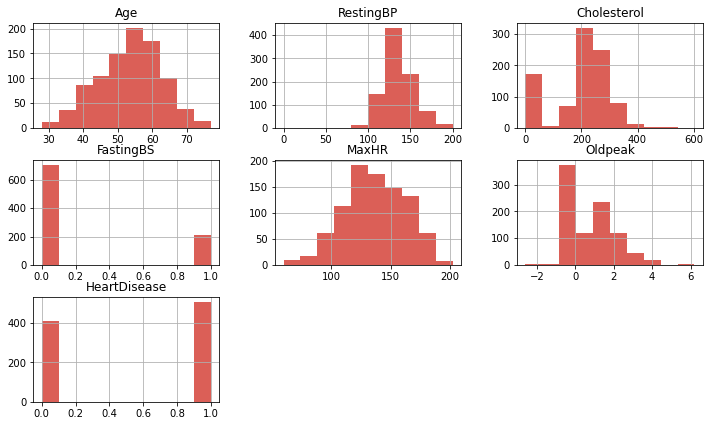

In [7]:
df.hist(figsize=(12,12), layout=(5,3));

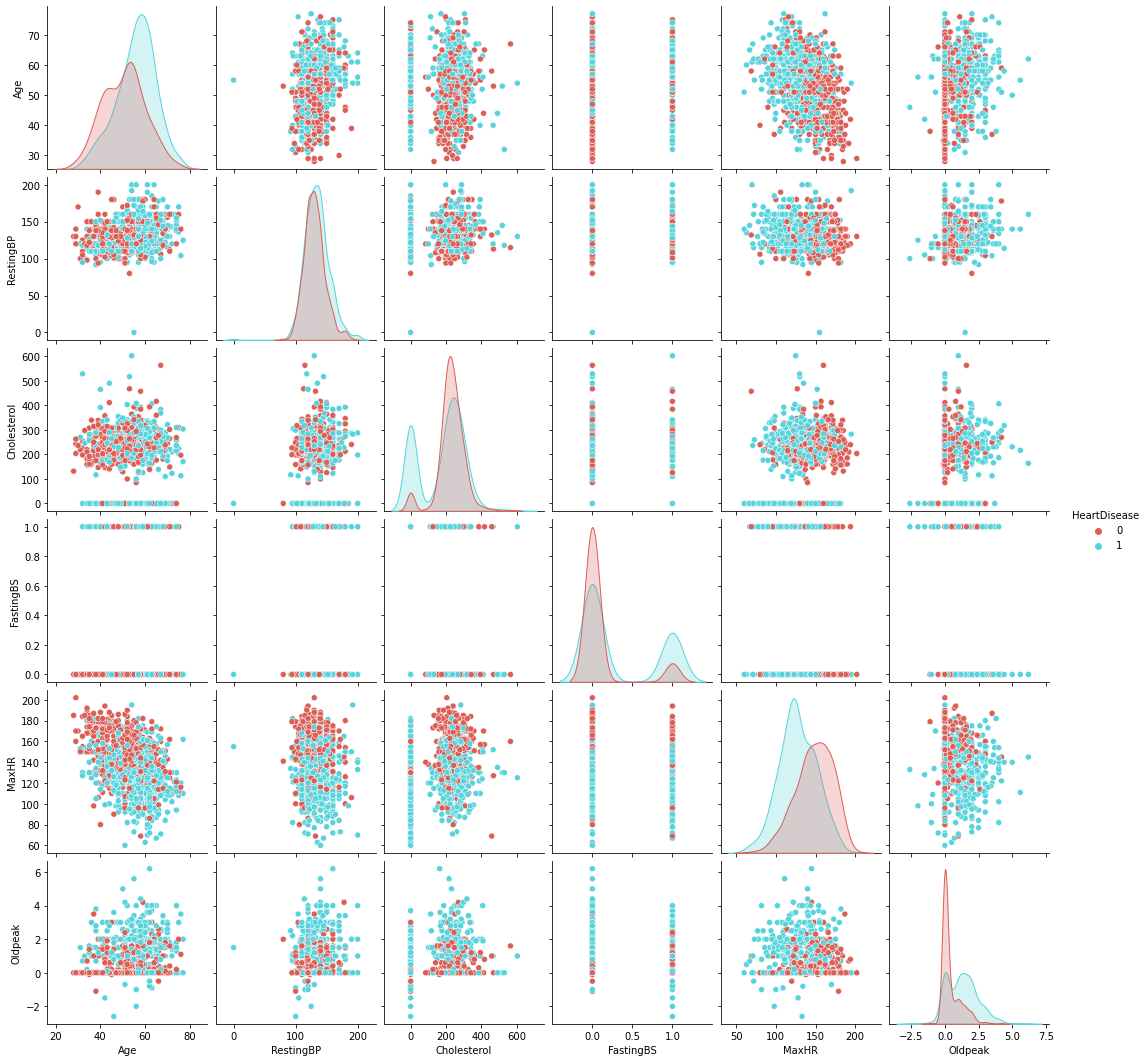

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=df, hue='HeartDisease') # pair plot 

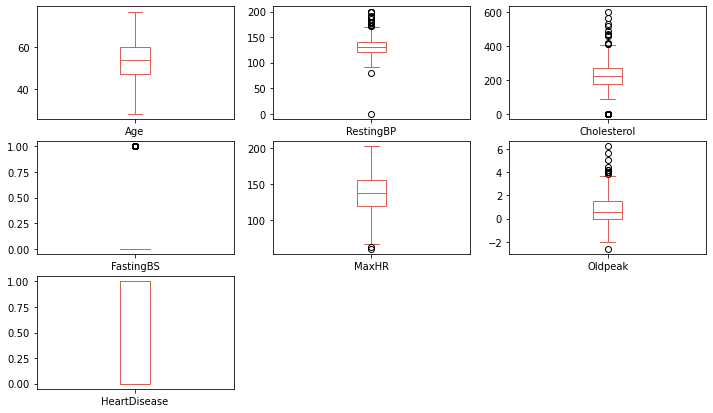

In [9]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

## Heart Disease by Sex

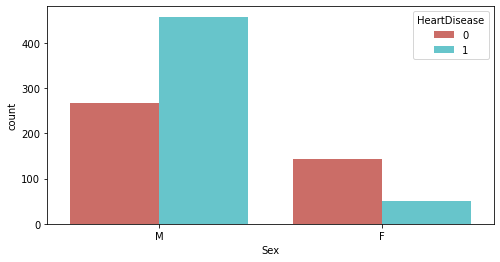

Percentage of Female Patients: 21.02%
Percentage of Male Patients: 78.98%


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Sex',hue='HeartDisease')
plt.show()

countFemale = len(df[df.Sex == 'F'])
countMale = len(df[df.Sex == 'M'])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

# Heart Disease by Age

In [11]:
#df updated with additional column, AgeGroup; 13 columns.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

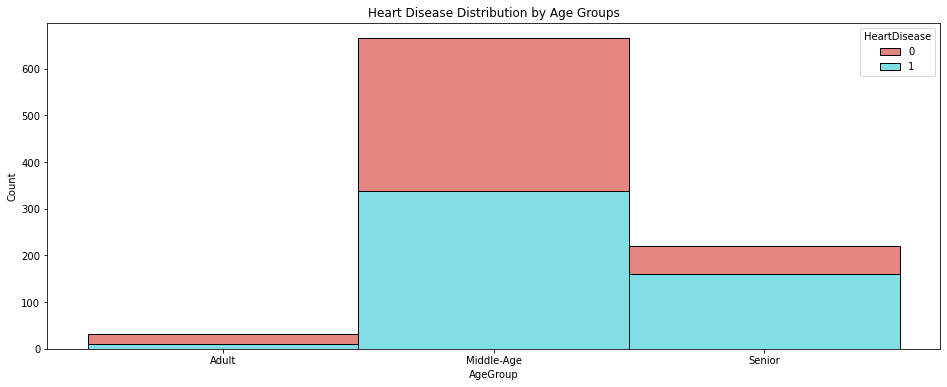

Percentage of Adult: 3.38%
Percentage of Middle-Age: 72.44%
Percentage of Senior: 24.07%


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

bins = [28,35,60,77]
labels = ['Adult', 'Middle-Age', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'],bins,labels=labels)

plt.figure(figsize=(16,6))
plt.title('Heart Disease Distribution by Age Groups')
sns.histplot(data=df,x='AgeGroup',hue='HeartDisease', multiple='stack', palette='hls')
plt.show()

countAdult = len(df[df.AgeGroup == 'Adult'])
countMiddleAge = len(df[df.AgeGroup == 'Middle-Age'])
countSenior = len(df[df.AgeGroup == 'Senior'])
print("Percentage of Adult: {:.2f}%".format((countAdult / (len(df.AgeGroup))*100)))
print("Percentage of Middle-Age: {:.2f}%".format((countMiddleAge / (len(df.AgeGroup))*100)))
print("Percentage of Senior: {:.2f}%".format((countSenior / (len(df.AgeGroup))*100)))

In [13]:
# Drop column
df.drop(['AgeGroup'], axis = 1, inplace=True)

# Heart Disease by Chestpain type

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

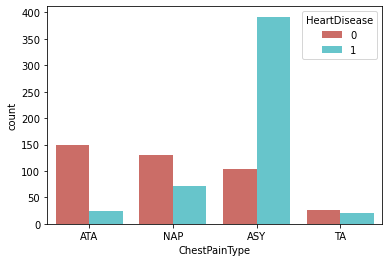

In [14]:
sns.countplot(data=df,x='ChestPainType',hue='HeartDisease')

# Heart Disease by RestingBP

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

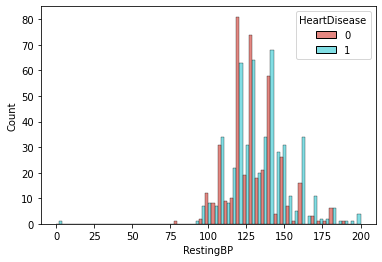

In [15]:
sns.histplot(data=df,x='RestingBP',hue='HeartDisease', multiple='dodge')

In [16]:
len(df[df['Cholesterol']==0]) # 172 records with cholesterol = 0

172

# Count of Heart Disease by Cholesterol level 

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

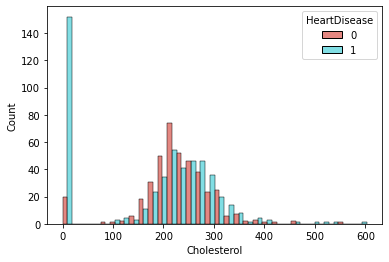

In [17]:
# showing cholesterol value 0 - ???
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', multiple='dodge') 


# Count of Heart Disease by FastingBS

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

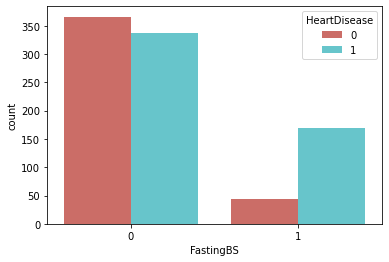

In [18]:
sns.countplot(data=df, x='FastingBS', hue='HeartDisease')


# Heart Disease by RestingECG

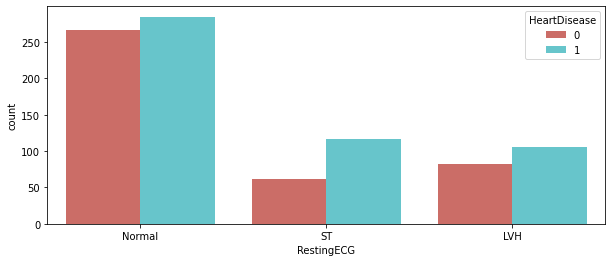

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='RestingECG',hue='HeartDisease')
plt.show()

# Heart Disease by MaxHR

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

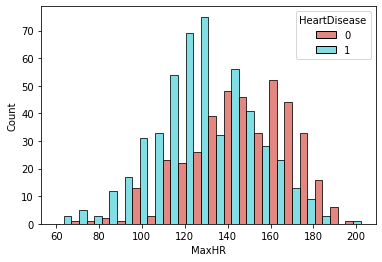

In [20]:
sns.histplot(data=df, x='MaxHR', hue='HeartDisease', multiple='dodge')


# Heart Disease by Exercise Angina

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

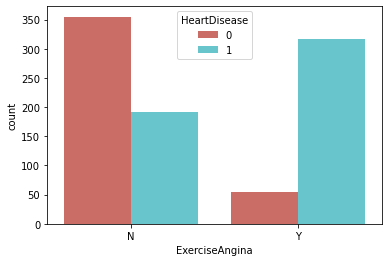

In [21]:
sns.countplot(data=df,x='ExerciseAngina',hue='HeartDisease')


In [22]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

# Heart Disease by Oldpeak

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

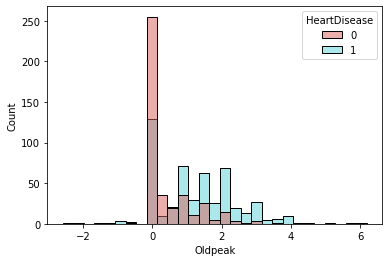

In [23]:
sns.histplot(data=df,x='Oldpeak',hue='HeartDisease') # showing negative values


# Heart Disease by ST_Slope

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

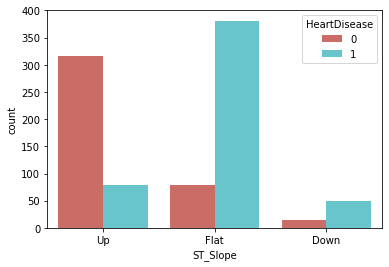

In [24]:
sns.countplot(data=df,x='ST_Slope',hue='HeartDisease')


## Correlation

In [25]:
df.corrwith(df["HeartDisease"])

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
dtype: float64

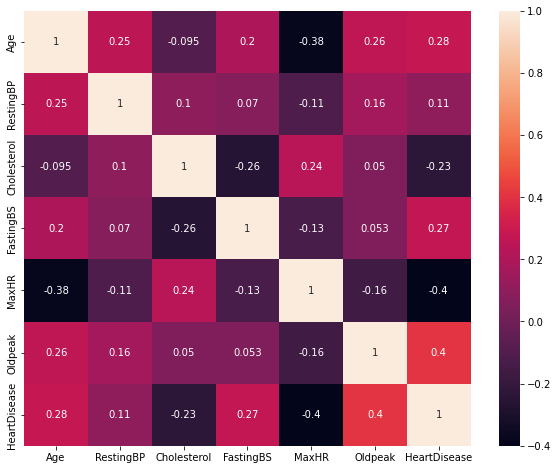

In [26]:
import seaborn as sns
%matplotlib inline

# Build correlation
corr = df.corr()

# Plot the heatmap correlation
plt.figure(figsize=(10,8))

sns.heatmap(corr, 
       xticklabels=corr.columns,
     yticklabels=corr.columns,
     annot=True)

plt.show()

# Heart Disease by gender and cholesterol

[Text(0.5, 1.0, 'Heart Disease by Gender and Cholesterol')]

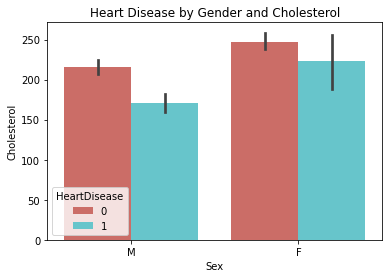

In [27]:
sns.barplot(data=df, x='Sex', y='Cholesterol', 
            hue='HeartDisease').set(title='Heart Disease by Gender and Cholesterol')


# Plot Heart Disease by Gender and Age

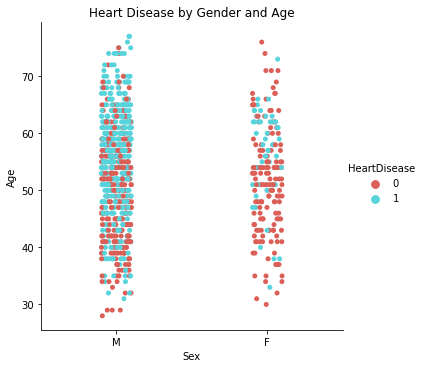

In [28]:
sns.catplot(data=df, x='Sex', y='Age', 
            hue='HeartDisease').set(title='Heart Disease by Gender and Age')

In [29]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

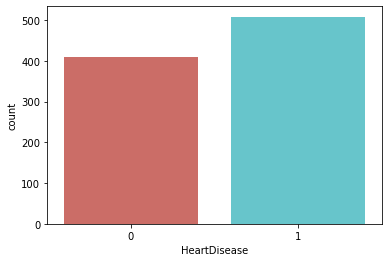

In [30]:
sns.countplot(x='HeartDisease', data=df)

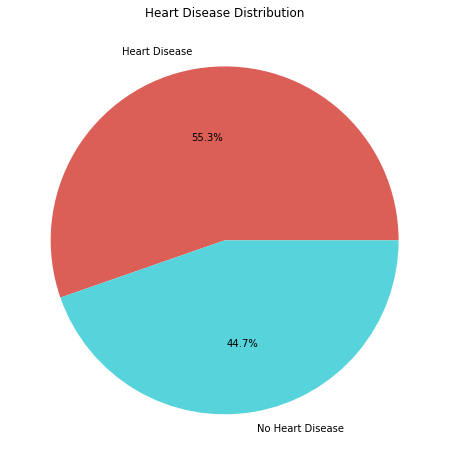

In [31]:
plt.figure(figsize=(8,8))

plt.pie(df['HeartDisease'].value_counts(), labels = ['Heart Disease', 'No Heart Disease'], 
        autopct = '%.1f%%')
plt.title('Heart Disease Distribution')
sns.set_palette('hls', 2)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

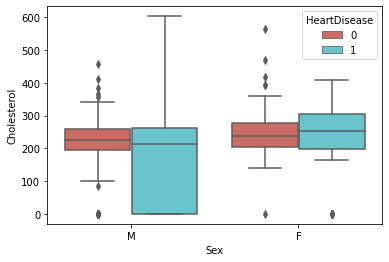

In [32]:
sns.boxplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=df)

In [33]:
df[df['Cholesterol']==0] # show number records where cholesterol = 0

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1  
..     ...            ...      ...      ...           ...  
514    120              N      0.5       Up             1  
515    160              N      3.0     Flat             0  
518    110              Y      1.0     Down             1  
535    122              Y      1.0     Flat             1  
536    119              Y      1.2     Flat             1  

[172 rows x 12 columns]

In [34]:
# replace zero to mean of cholesterol

cholesterol_zero = ['Cholesterol']

for column in cholesterol_zero:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

In [35]:
df[df['Cholesterol']==0]  # no more zero cholesterol

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC     # Support Vector Machines
from sklearn.neural_network import MLPClassifier  # MLPClassifier


In [37]:
cat_data = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [38]:
standardScaler = StandardScaler() # pre-processing the data

In [39]:
numeric_var = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [40]:
cat_data[numeric_var] = standardScaler.fit_transform(cat_data[numeric_var])

In [41]:
cat_data

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  \
0   -1.433140   0.410909     0.834754  1.382928 -0.832432             0   
1   -0.478484   1.491752    -1.210675  0.754157  0.105664             1   
2   -1.751359  -0.129513     0.722161 -1.525138 -0.832432             0   
3   -0.584556   0.302825    -0.572651 -1.132156  0.574711             1   
4    0.051881   0.951331    -0.929194 -0.581981 -0.832432             0   
..        ...        ...          ...       ...       ...           ...   
913 -0.902775  -1.210356     0.365619 -0.188999  0.293283             1   
914  1.536902   0.627078    -0.966725  0.164684  2.357094             1   
915  0.370100  -0.129513    -2.130180 -0.857069  0.293283             1   
916  0.370100  -0.129513    -0.159813  1.461525 -0.832432             1   
917 -1.645286   0.302825    -1.304502  1.422226 -0.832432             0   

     Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  \
0        0      1                  0                  1  ...            1   
1        1      0                  0                  0  ...            1   
2        0      1                  0                  1  ...            1   
3        1      0                  1                  0  ...            1   
4        0      1                  0                  0  ...            1   
..     ...    ...                ...                ...  ...          ...   
913      0      1                  0                  0  ...            1   
914      0      1                  1                  0  ...            0   
915      0      1                  1                  0  ...            1   
916      1      0                  0                  1  ...            1   
917      0      1                  0                  0  ...            1   

     FastingBS_1  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0              0               0                  1              0   
1              0               0                  1              0   
2              0               0                  0              1   
3              0               0                  1              0   
4              0               0                  1              0   
..           ...             ...                ...            ...   
913            0               0                  1              0   
914            1               0                  1              0   
915            0               0                  1              0   
916            0               1                  0              0   
917            0               0                  1              0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                   1                 0              0              0   
1                   1                 0              0              1   
2                   1                 0              0              0   
3                   0                 1              0              1   
4                   1                 0              0              0   
..                ...               ...            ...            ...   
913                 1                 0              0              1   
914                 1                 0              0              1   
915                 0                 1              0              1   
916                 1                 0              0              1   
917                 1                 0              0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 22 columns]

In [42]:
x = cat_data.drop(['HeartDisease'], axis = 1) # independent variable
y = cat_data['HeartDisease']        # dependent variable

In [43]:
x.head()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex_F  Sex_M  \
0 -1.433140   0.410909     0.834754  1.382928 -0.832432      0      1   
1 -0.478484   1.491752    -1.210675  0.754157  0.105664      1      0   
2 -1.751359  -0.129513     0.722161 -1.525138 -0.832432      0      1   
3 -0.584556   0.302825    -0.572651 -1.132156  0.574711      1      0   
4  0.051881   0.951331    -0.929194 -0.581981 -0.832432      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  FastingBS_0  \
0                  0                  1                  0  ...            1   
1                  0                  0                  1  ...            1   
2                  0                  1                  0  ...            1   
3                  1                  0                  0  ...            1   
4                  0                  0                  1  ...            1   

   FastingBS_1  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0            0               0                  1              0   
1            0               0                  1              0   
2            0               0                  0              1   
3            0               0                  1              0   
4            0               0                  1              0   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                 1                 0              0              0   
1                 1                 0              0              1   
2                 1                 0              0              0   
3                 0                 1              0              1   
4                 1                 0              0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1  

[5 rows x 21 columns]

In [44]:
print(x.shape)

(918, 21)


In [45]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [46]:
y.shape

(918,)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.2, random_state=3)

In [48]:
x_train.shape

(183, 21)

In [49]:
x_train

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  Sex_F  Sex_M  \
341  1.112610  -1.210356    -0.009689 -0.896367  0.387092      0      1   
380  0.688318   1.491752    -0.009689 -1.485840 -0.363384      0      1   
344 -0.266338  -0.669935    -0.009689 -1.289349 -0.832432      0      1   
471  1.536902   0.302825    -0.009689 -0.267596  1.981855      0      1   
743 -0.160265   0.086656    -0.816602  0.832754 -0.081956      0      1   
..        ...        ...          ...       ...       ...    ...    ...   
256  0.157954  -0.129513     2.805121  0.518368 -0.832432      1      0   
643  0.476173  -1.102272    -0.272405  1.107841  1.512807      0      1   
249 -0.478484  -0.129513     1.810555 -0.660578  0.105664      0      1   
664  1.218683   0.951331    -0.366232 -0.896367  0.105664      1      0   
874 -1.114921   0.951331     0.046607  1.343630  0.574711      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
341                  1                  0                  0  ...   
380                  1                  0                  0  ...   
344                  1                  0                  0  ...   
471                  1                  0                  0  ...   
743                  0                  1                  0  ...   
..                 ...                ...                ...  ...   
256                  0                  1                  0  ...   
643                  0                  0                  1  ...   
249                  1                  0                  0  ...   
664                  1                  0                  0  ...   
874                  1                  0                  0  ...   

     FastingBS_0  FastingBS_1  RestingECG_LVH  RestingECG_Normal  \
341            0            1               0                  1   
380            1            0               0                  0   
344            0            1               0                  1   
471            1            0               0                  1   
743            1            0               0                  1   
..           ...          ...             ...                ...   
256            1            0               1                  0   
643            1            0               1                  0   
249            1            0               0                  1   
664            1            0               1                  0   
874            1            0               0                  1   

     RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
341              0                 0                 1              1   
380              1                 0                 1              0   
344              0                 1                 0              0   
471              0                 0                 1              0   
743              0                 1                 0              0   
..             ...               ...               ...            ...   
256              0                 1                 0              0   
643              0                 1                 0              0   
249              0                 0                 1              0   
664              0                 1                 0              0   
874              0                 1                 0              0   

     ST_Slope_Flat  ST_Slope_Up  
341              0            0  
380              1            0  
344              1            0  
471              1            0  
743              0            1  
..             ...          ...  
256              0            1  
643              1            0  
249              1            0  
664              1            0  
874              0            1  

[183 rows x 21 columns]

In [50]:
x_test.shape

(735, 21)

In [51]:
y_train.shape

(183,)

In [52]:
y_test.shape

(735,)

# KNN model 

In [53]:
#https://www.youtube.com/watch?v=j-uHsi-KjOs ##How to find the optimal value of k without over-fitting
# KNN model 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

k_values = [i for i in range(1, 51, 2)]

In [54]:
# empty list that will hold cv score

k_acc_scores = []

In [55]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn,x_train,y_train,cv=5, scoring = 'accuracy')
    k_acc_scores.append(cv_scores.mean())
    
optimal_k = k_values[k_acc_scores.index(max(k_acc_scores))]  # finding optimal value of k

print('Optimal k value is {}'.format(optimal_k))

Optimal k value is 7


In [56]:
k_acc_scores

[0.748048048048048,
 0.8141141141141143,
 0.8250750750750753,
 0.836036036036036,
 0.8306306306306306,
 0.825075075075075,
 0.8195195195195195,
 0.8306306306306306,
 0.8141141141141143,
 0.813963963963964,
 0.8085585585585587,
 0.803003003003003,
 0.8084084084084084,
 0.8084084084084084,
 0.7975975975975975,
 0.7974474474474474,
 0.7810810810810811,
 0.7918918918918919,
 0.7918918918918919,
 0.7864864864864864,
 0.7864864864864864,
 0.7864864864864864,
 0.7921921921921923,
 0.7921921921921923,
 0.7867867867867868]

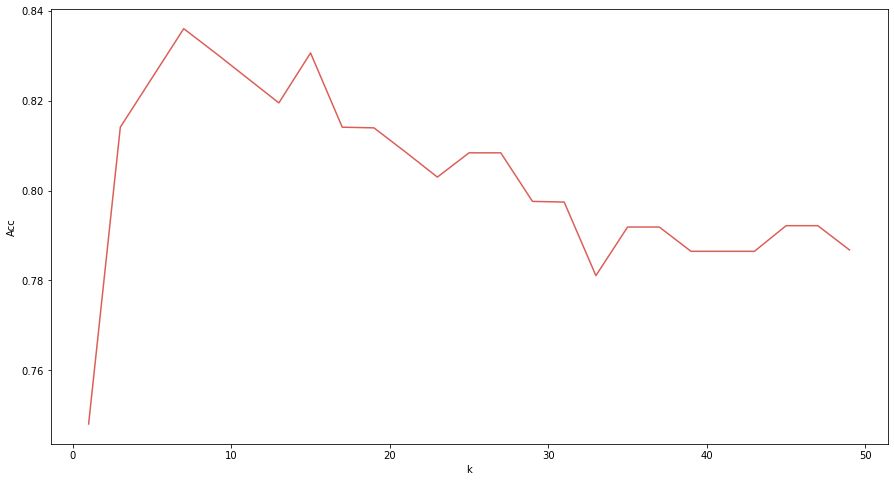

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(k_values, k_acc_scores)
plt.xlabel('k')
plt.ylabel('Acc')
plt.show()

In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors = 23)
score=cross_val_score(knn,x_train,y_train,cv=5)

acc = score.mean()*100

print('KNN Accuracy: {:.2f}%'.format(acc))

KNN Accuracy: 78.68%


# Logistic Regression

In [59]:
# https://www.youtube.com/watch?v=VCJdg7YBbAQ ##Logistic Regression in Python

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Logistic Regression 
lr_model = LogisticRegression() 
lr_model.fit(x_train, y_train) # fit the model

# Predict labels according
Y_pred = lr_model.predict(x_test)

In [60]:
# classification report

from sklearn.metrics import classification_report

classification_report(y_test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82       322\n           1       0.87      0.84      0.85       413\n\n    accuracy                           0.84       735\n   macro avg       0.84      0.84      0.84       735\nweighted avg       0.84      0.84      0.84       735\n'

In [61]:
# confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[270,  52],
       [ 67, 346]], dtype=int64)

In [62]:
# accuracy of Logistic Regression model 

from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, Y_pred) * 100

print('Logistic Regression Model accuracy:{:.2f}%'.format(lr_accuracy)) 

Logistic Regression Model accuracy:83.81%


# Support Vector Model

In [63]:
# SVC 
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Predict labels according
Y_pred = svm_model.predict(x_test)

# Classification report
classification_report(y_test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.80      0.82       322\n           1       0.85      0.89      0.87       413\n\n    accuracy                           0.85       735\n   macro avg       0.85      0.84      0.85       735\nweighted avg       0.85      0.85      0.85       735\n'

In [64]:
# confusion matrix

confusion_matrix(y_test, Y_pred)

array([[257,  65],
       [ 45, 368]], dtype=int64)

In [65]:
svm_accuracy = accuracy_score(y_test, Y_pred) * 100

print('Support Vector Model accuracy:{:.2f}%'.format(svm_accuracy)) 

Support Vector Model accuracy:85.03%


# Neural Network 

In [66]:
# Neural Network 
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train)

print('Neural Network Accuracy: {:.2f}%'.format(nn_model.score(x_test, y_test) * 100))

Neural Network Accuracy: 82.45%


# Mutual Inforamtion

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [67]:
# https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb

from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info


array([0.01746489, 0.        , 0.02623412, 0.05449273, 0.13917958,
       0.02013476, 0.        , 0.20440621, 0.05944405, 0.09356248,
       0.        , 0.04152391, 0.06708116, 0.        , 0.0386882 ,
       0.04963731, 0.16616527, 0.04913001, 0.03536423, 0.14225905,
       0.21067135])

In [68]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

ST_Slope_Up          0.210671
ChestPainType_ASY    0.204406
ExerciseAngina_N     0.166165
ST_Slope_Flat        0.142259
Oldpeak              0.139180
ChestPainType_NAP    0.093562
FastingBS_1          0.067081
ChestPainType_ATA    0.059444
MaxHR                0.054493
RestingECG_ST        0.049637
ExerciseAngina_Y     0.049130
FastingBS_0          0.041524
RestingECG_Normal    0.038688
ST_Slope_Down        0.035364
Cholesterol          0.026234
Sex_F                0.020135
Age                  0.017465
RestingECG_LVH       0.000000
RestingBP            0.000000
Sex_M                0.000000
ChestPainType_TA     0.000000
dtype: float64

<AxesSubplot:>

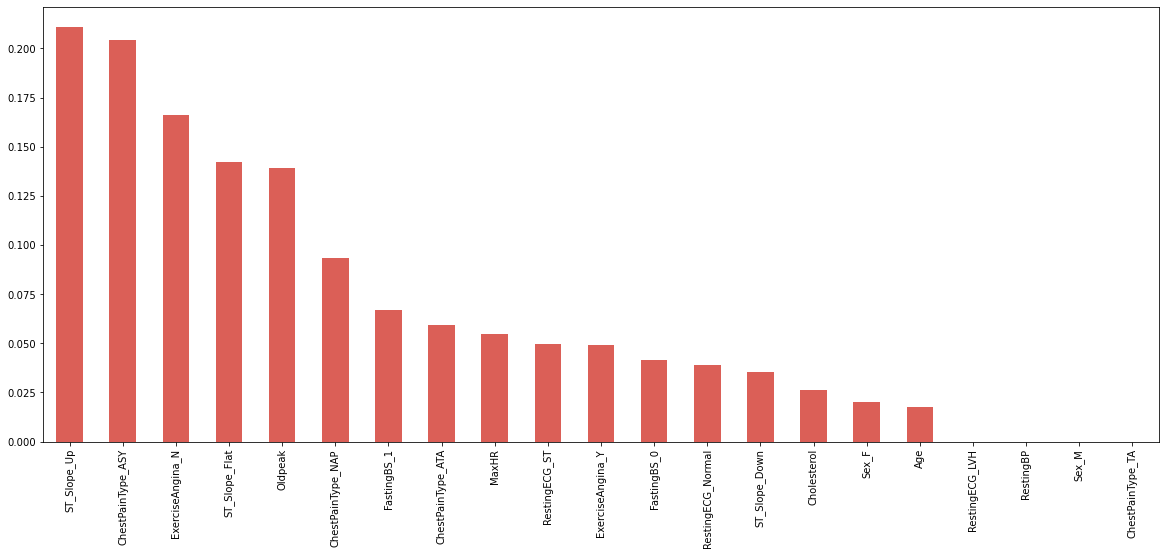

In [69]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [70]:
from sklearn.feature_selection import SelectKBest

In [71]:
# we will select the top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif,  k =10)
sel_ten_cols.fit(x_train, y_train)
x_train.columns[sel_ten_cols.get_support()]

Index(['MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'FastingBS_0', 'FastingBS_1', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [72]:
!pip install lime


In [73]:
print(x_test.iloc[2])
print(y_test.iloc[2])

Age                  0.264027
RestingBP            0.248782
Cholesterol         -0.685244
MaxHR               -0.581981
Oldpeak              0.856140
Sex_F                0.000000
Sex_M                1.000000
ChestPainType_ASY    0.000000
ChestPainType_ATA    0.000000
ChestPainType_NAP    1.000000
ChestPainType_TA     0.000000
FastingBS_0          0.000000
FastingBS_1          1.000000
RestingECG_LVH       0.000000
RestingECG_Normal    0.000000
RestingECG_ST        1.000000
ExerciseAngina_N     0.000000
ExerciseAngina_Y     1.000000
ST_Slope_Down        0.000000
ST_Slope_Flat        1.000000
ST_Slope_Up          0.000000
Name: 557, dtype: float64
1


In [74]:
import lime
from lime import lime_tabular
#Testing our NN model against individual data sets

# reference https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['Not Heart Disease','Heart Disease'],
    mode='classification'
)


exp = explainer.explain_instance(
    data_row=x_test.iloc[2], 
    predict_fn=nn_model.predict_proba
)

exp.show_in_notebook(show_table=True)

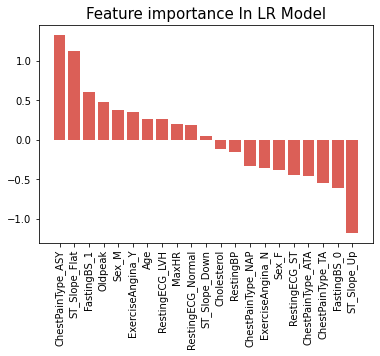

In [75]:
# Feature importance
# https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155



importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': lr_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importance In LR Model', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
# Use important features gained above
x_train2 = x_train.copy()
x_test2 = x_test.copy()
x_train2.drop(['ST_Slope_Up','FastingBS_0','Sex_F','FastingBS_0','ChestPainType_ATA','Cholesterol','ExerciseAngina_N','ChestPainType_NAP',
          'RestingECG_ST','ST_Slope_Down','MaxHR','RestingECG_Normal','RestingBP'], axis = 1, inplace=True)

x_test2.drop(['ST_Slope_Up','FastingBS_0','Sex_F','FastingBS_0','ChestPainType_ATA','Cholesterol','ExerciseAngina_N','ChestPainType_NAP',
          'RestingECG_ST','ST_Slope_Down','MaxHR','RestingECG_Normal','RestingBP'], axis = 1, inplace=True)
# Run new 
nn_model1 = MLPClassifier()
nn_model2 = MLPClassifier()

nn_model1.fit(x_train2, y_train)
nn_model2.fit(x_train, y_train)
print('Neural Network Accuracy1: {:.2f}%'.format(nn_model1.score(x_test2, y_test) * 100))
print('Neural Network Accuracy2: {:.2f}%'.format(nn_model2.score(x_test, y_test) * 100))

Neural Network Accuracy1: 83.13%
Neural Network Accuracy2: 83.27%


In [77]:
for col in x_train2.columns:
    print(col)

Age
Oldpeak
Sex_M
ChestPainType_ASY
ChestPainType_TA
FastingBS_1
RestingECG_LVH
ExerciseAngina_Y
ST_Slope_Flat


In [78]:
# Removing features does not help since the model is already weighing them
# Base line
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train)
print('Neural Network Accuracy2: {:.2f}%'.format(nn_model.score(x_test, y_test) * 100))

Neural Network Accuracy2: 82.86%


In [79]:
#Tune more
# This is going to test all paramaters
# https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','invscaling','adaptive'],
}

clf = GridSearchCV(nn_model, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic', 'identity'],
                         'alpha': [0.0001, 0.05],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [80]:
print('Best parameters found:\n', clf.best_params_)


Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [81]:
# Try new params
nn_model_tune_2 = MLPClassifier(max_iter=100, activation='relu', alpha=0.5, learning_rate='invscaling',
                             solver = 'adam')
nn_model_tune_2.fit(x_train, y_train)
print('Neural Network Accuracy2: {:.2f}%'.format(nn_model_tune_2.score(x_test, y_test) * 100))

Neural Network Accuracy2: 84.49%


In [82]:
#Gradient boost test
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

print('Neural Network Accuracy2: {:.2f}%'.format(gb_model.score(x_test, y_test) * 100))

Neural Network Accuracy2: 83.95%


In [83]:
# Tune Gradient boost

from sklearn.model_selection import GridSearchCV

parameter_space = {
    'loss' : ['deviance','exponential'],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_features': ['auto', 'sqrt','log2'],
}

clf2 = GridSearchCV(gb_model, parameter_space, n_jobs=-1, cv=3)
clf2.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [84]:
print('Best parameters found:\n', clf2.best_params_)


Best parameters found:
 {'criterion': 'mae', 'loss': 'deviance', 'max_features': 'log2'}


In [85]:
#Gradient boost test
from sklearn.ensemble import GradientBoostingClassifier


gb_model_tune = GradientBoostingClassifier(criterion='mae', loss='exponential', max_features='sqrt')
gb_model_tune.fit(x_train, y_train)

print('Neural Network Accuracy2: {:.2f}%'.format(gb_model_tune.score(x_test, y_test) * 100))

Neural Network Accuracy2: 82.72%


In [86]:
# Tune SVM

# SVC baseline 
svm_model = SVC(random_state=3)
svm_model.fit(x_train, y_train)

print('Support Vector Machine Accuracy: {:.2f}%'.format(svm_model.score(x_test, y_test) * 100))

Support Vector Machine Accuracy: 85.03%


In [87]:
# Tune
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'kernel': ['linear', 'poly', 'bf', 'sigmoid'],
    'gamma': ['scale','auto'],
    'shrinking' : [True,False],
    'probability': [True,False],
    'verbose': [True, False],
    'decision_function_shape': ['ovo','ovr'],
    'break_ties': [True,False],
}
svm_model = SVC(random_state=3)

clf2 = GridSearchCV(svm_model, parameter_space, n_jobs=-1, cv=5)
clf2.fit(x_train, y_train)


[LibSVM]

GridSearchCV(cv=5, estimator=SVC(random_state=3), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'bf', 'sigmoid'],
                         'probability': [True, False],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [88]:
print('Best parameters found:\n', clf2.best_params_)


Best parameters found:
 {'break_ties': True, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True, 'shrinking': True, 'verbose': True}


In [89]:
# Test new params

svm_model_tune = SVC(kernel='sigmoid', gamma='auto', decision_function_shape='ovr', break_ties=True, probability=True,
               shrinking=True, verbose=True, random_state=3)
svm_model_tune.fit(x_train, y_train)

print('Support Vector Machine Accuracy: {:.2f}%'.format(svm_model_tune.score(x_test, y_test) * 100))

[LibSVM]Support Vector Machine Accuracy: 84.22%


In [90]:
# Predict SVM

import lime
from lime import lime_tabular
#Testing our NN model against individual data sets

# reference https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['Not Heart Disease','Heart Disease'],
    mode='classification'
)


exp = explainer.explain_instance(
    data_row=x_test.iloc[2], 
    predict_fn=svm_model_tune.predict_proba
)

exp.show_in_notebook(show_table=True)

In [91]:
import lime
from lime import lime_tabular
#Testing our NN model against individual data sets

# reference https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['Not Heart Disease','Heart Disease'],
    mode='classification'
)


exp = explainer.explain_instance(
    data_row=x_test.iloc[4], 
    predict_fn=svm_model_tune.predict_proba
)

exp.show_in_notebook(show_table=True)

Accuracy:84.22%
[0, 1]


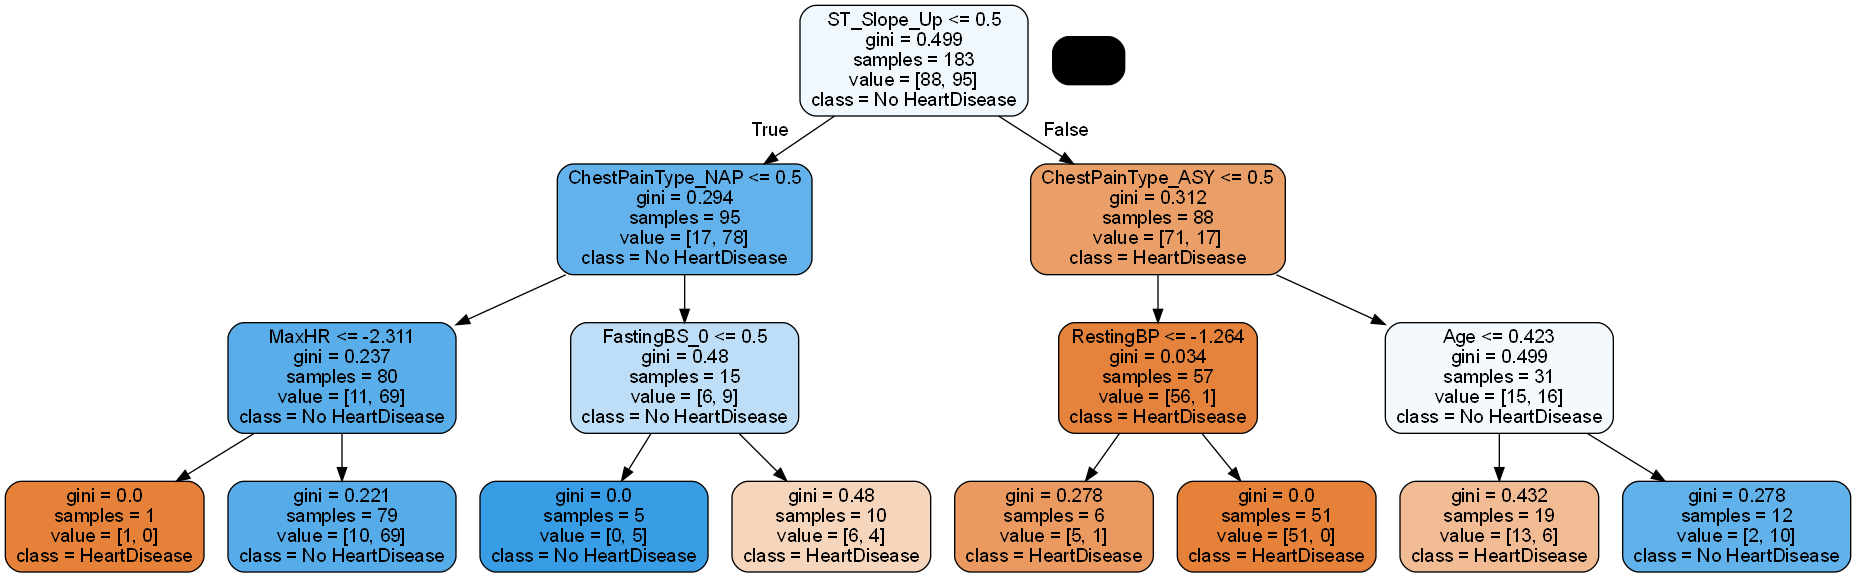

In [92]:
from IPython.display import Image, display
from sklearn.tree import export_graphviz
from six import StringIO
import graphviz
import pydotplus
from graphviz import Source

import statistics
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, splitter="best")

dt_model = dt_model.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)* 100))
print(list(set(y_pred)))


labels = y.unique()
feature_names = x.columns
labels = ['HeartDisease', 'No HeartDisease']

# Lets see the decision tree
dot_data = export_graphviz(dt_model,
out_file=None,
filled=True,
rounded=True,
#special_characters=True,
feature_names = feature_names,
class_names = labels
)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [93]:
#export code to html file
from nbconvert import HTMLExporter
import codecs
import nbformat

notebook_name = 'heart-health-combined_Elizabeth.ipynb'
output_file_name = 'heart-health-FINAL.html'

exporter = HTMLExporter()
output_notebook = nbformat.read(notebook_name, as_version=4)

output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(output_file_name, 'w', encoding='utf-8').write(output)